In [2]:
import numpy as np
import pandas as pd 

In [4]:
df = pd.read_csv('stl_train.csv')
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


<Axes: xlabel='date'>

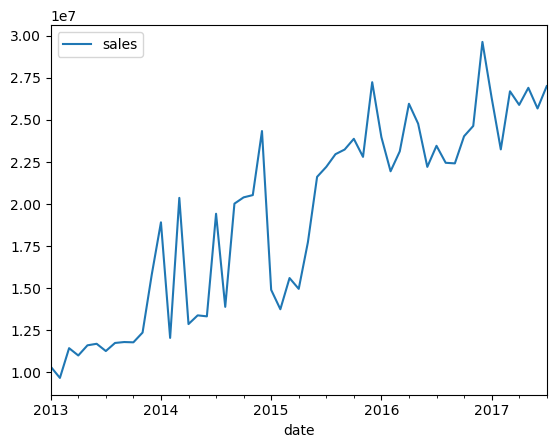

In [5]:
df_grouped = df[['date', 'sales']].groupby('date').sum()
df_grouped.index = pd.to_datetime(df_grouped.index, format="%Y-%m-%d")
data = df_grouped.resample('M').sum()[:-1]
data.plot()

In [6]:
train_data = data.sales[:-12]
test_data = data.sales[-12:]

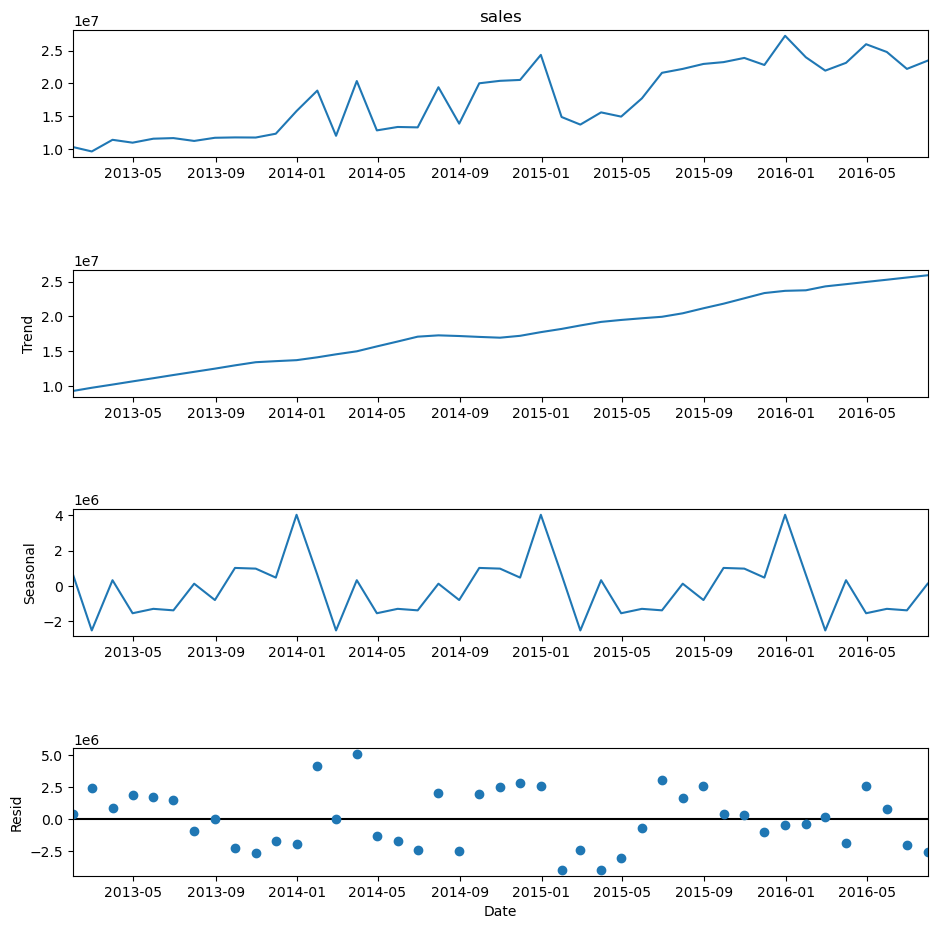

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Decompose data by selecting the appropiate frequency
decomp = sm.tsa.seasonal_decompose(
  train_data, period=12,extrapolate_trend=True)
decomp_plot = decomp.plot()

# Plot outcome
plt.xlabel('Date')
decomp_plot.set_figheight(10)
decomp_plot.set_figwidth(10)
plt.show()

In [8]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA

# Decompose the time series with STL
stl = STL(train_data, seasonal=13)
result = stl.fit()

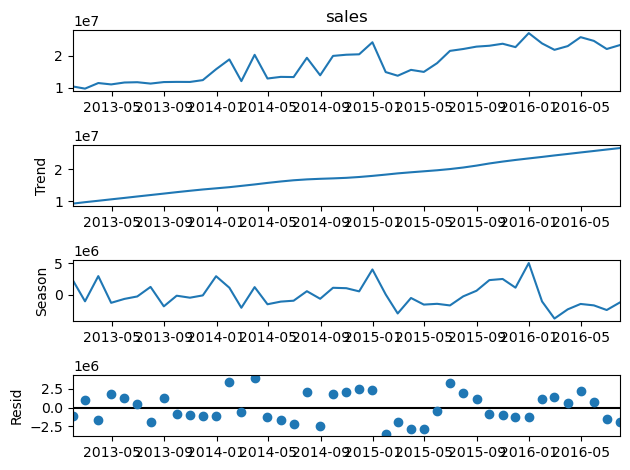

In [9]:
result.plot()
plt.show()

In [10]:
def forecast_seasonal_component(result, steps, seasonal_period):
    seasonal_component = np.tile(result.seasonal[-12:], steps // 12)
    if steps % 12:
        seasonal_component = np.concatenate([seasonal_component, result.seasonal[-12:-12+steps%12]])

    return seasonal_component 

In [11]:
deseasonalized = train_data - result.seasonal

In [18]:
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

stlf = STLForecast(train_data, ARIMA, model_kwargs={"order": (0, 1, 1)})
model = stlf.fit()
forecasts = model.forecast(steps=12)

In [45]:
train_value=[]
forecast_value=[]
for i,j in zip(train_data,forecasts):
    train_value.append(round(i,3))
    forecast_value.append(round(i,3))
Final_Report=pd.DataFrame(zip(train_data.index,train_value,forecast_value),columns=['Date','Orignal Value','Forecasting'])
    

In [47]:
for i,j in zip(train_data,forecasts):
    train_value.append(round(i,3))

In [48]:
train_value

[10327624.737,
 9658959.777,
 11428497.037,
 10993464.738,
 11597704.007,
 11689344.062,
 11257400.608,
 11737788.919,
 11792933.232,
 11775620.361,
 12356559.293,
 15803117.148,
 10327624.737,
 9658959.777,
 11428497.037,
 10993464.738,
 11597704.007,
 11689344.062,
 11257400.608,
 11737788.919,
 11792933.232,
 11775620.361,
 12356559.293,
 15803117.148]

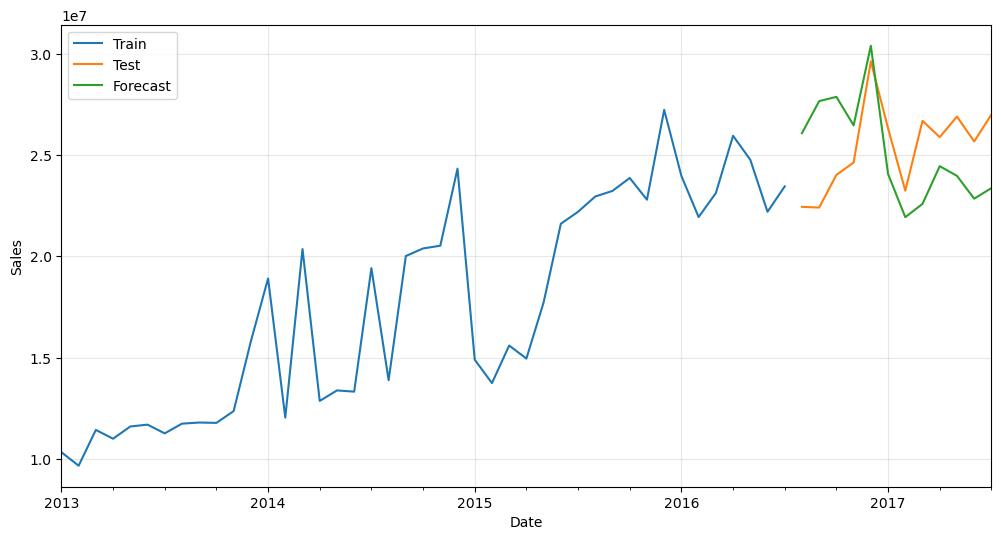

In [19]:
ax = train_data.plot(figsize=(12,6))
test_data.plot(ax=ax)
forecasts.plot(ax=ax)
plt.grid(alpha=0.3)
plt.legend(['Train', 'Test', 'Forecast'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()